# Использование модели линейной регрессии для решения задач предсказания значений

Рассмотрим данные, которые будут использованы для исследования:

```
1   2272
2   nan
3   1386
4   1365
5   1488
6   1337
7   1883
8   2283
...

```

Данные хранятся в файле ```web_traffic.tsv``` и представляют статистику посещений веб-сервера компании и нашей задачей является предсказание значения посещения, для того, чтобы выделить в нужный момент времени дополнительную мощность сервера и не допустить его перегрузки.
В файле находятся данные за последний месяц. Слева находится индекс или номер часа по порядку, в который производился замер посещаемости, а справа - количество запросов сайта за этот час.
Первый этап работы - считывание данных из файла. Используем в этот раз библиотеку ```scipy```.

In [2]:
import scipy as sp

data = sp.genfromtxt('web_traffic.tsv', delimiter='\t')

print(data[:10]) # Вопрос самопроверки: как называется фрагмент кода [:10] и что он делает?

print(data.shape) # Мы считали все данные и создали из них двумерный массив

# Распределим данные по двум векторам - одномерным массивам

x = data[:,0]

y = data[:,1]

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]
(743, 2)


Как видно из кода выше среди значений есть пропуски. Удалим эти пропуски из данных?


In [7]:
x_orig = data[:,0]
y_orig = data[:,1]

# print(sp.isnan(y))  # выводит вектор (матрицу) значений: является ли каждое значение из вектора NaN

x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

Визуализируем полученные значения, нанеся их на график в виде диаграммы рассеяния с помощью ```matplotlib```.

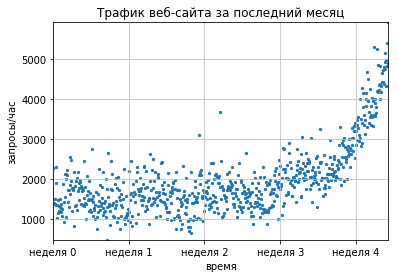

In [9]:
%matplotlib inline 
import matplotlib.pyplot as pplt


pplt.scatter(x, y, s=5) # Какой параметр задает s для метода scatter? 
pplt.title('Трафик веб-сайта за последний месяц')

pplt.xlabel("время")
pplt.ylabel("запросы/час")

pplt.xticks([w*7*24 for w in range(10)],["неделя %i" % w for w in range(10)])
pplt.autoscale(tight=True)

pplt.grid(True, linestyle='-', color='0.75')
pplt.show()

Данные построены на диаграмме рассеяния и теперь можно начать подбор модели для того, чтобы мочь предсказывать значения, которых нет в выборке.
Но есть одно "но". Нашей задачей является построить такую модель, чтобы точность её работы была минимальной, а значит мы должны как-то оценить погрешность её работы.

В простейшем случае мы будем оценивать погрешность с помощью такой функции ошибки:


```python 
def error(f,x,y):
    return sp.sum((f(x)-y)**2)  # векторное вычисление суммы квадратов отклонений значений функции от известных
                                # значений целевого параметра (y)
```

Для начала (без анализа графика) предположим, что данные моделируются прямой линией.

Наша задача - найти прямую, для которой погрешность аппроксимации минимальна. Это можно сделать и вручную (см. алгоритм градиентного спуска), однако, воспользуемся возможностями библиотеки ```scipy```:

In [13]:
f1p, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)# polyfit подбирает коэффициенты модели
                                                                # таким образом, чтобы ошибка были минимальна
                                                                # коэффициент 1 - степень полинома, линейное
                                                                # уравнение
print("Параметры модели {}".format(f1p))

Параметры модели [  2.59619213 989.02487106]


Таким образом, наша модель будет выглядеть следующим образом:


```f(x) = 2.59619213 * x + 989.02487106```


С помощью методы ```poly1d``` мы сможем получить модель для предсказания с полученными параметрами: при x и свободным членом (см. строчку выше).

Посчитаем ошибку с помощью нашей функции ошибок error:

In [17]:
import scipy as sp

def error(f,x,y):
    return sp.sum((f(x)-y)**2)

f1 = sp.poly1d(f1p)
print(f"{error(f1, x, y):.5}")


3.1739e+08


Отобразим линию модели на диаграмме:

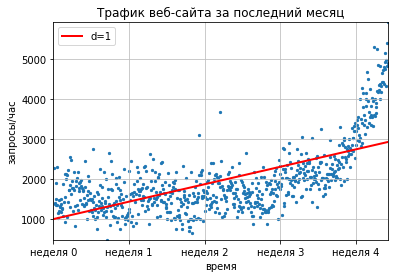

In [19]:
%matplotlib inline 
import matplotlib.pyplot as pplt


pplt.scatter(x, y, s=5) # Какой параметр задает s для метода scatter? 

# отобразим модель 

fx=sp.linspace(0,x[-1],500) # сгенерировать значения x для графика
# sp.linspace?
pplt.plot(fx,f1(fx),linewidth=2.0,color='r')
pplt.legend(["d=%i" % f1.order], loc="upper left")

# -----

pplt.title('Трафик веб-сайта за последний месяц')

pplt.xlabel("время")
pplt.ylabel("запросы/час")

pplt.xticks([w*7*24 for w in range(10)],["неделя %i" % w for w in range(10)])
pplt.autoscale(tight=True)

pplt.grid(True, linestyle='-', color='0.75')
pplt.show()

Усложним модель и изменим степень полинома на 2.

In [22]:
f2p, residuals, rank, sv, rcond = sp.polyfit(x, y, 2, full=True)

print("Параметры модели {}".format(f2p))

f2 = sp.poly1d(f2p)
print(f"{error(f2, x, y):.5}")
print(error(f1, x, y)) # Предыдущее значение ошибки

Параметры модели [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
1.7998e+08
317389767.339778


Видно, что коэффициент ошибки уменьшился значительно. Т.е. степень полинома 2 лучше адаптирована к данным.

Построим несколько моделей разных степеней полинома (3,4..50)

In [24]:
f3p, residuals, rank, sv, rcond = sp.polyfit(x, y, 3, full=True)
print("Параметры модели 3 {}".format(f3p))

f3 = sp.poly1d(f3p)
print(f"{error(f3, x, y):.5}")

f4p, residuals, rank, sv, rcond = sp.polyfit(x, y, 4, full=True)
print("Параметры модели 4 {}".format(f4p))

f4 = sp.poly1d(f4p)
print(f"{error(f4, x, y):.5}")

f5p, residuals, rank, sv, rcond = sp.polyfit(x, y, 5, full=True)
print("Параметры модели 5 {}".format(f5p))

f5 = sp.poly1d(f5p)
print(f"{error(f5, x, y):.5}")

Параметры модели 3 [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
1.3935e+08
Параметры модели 4 [ 8.98767483e-08 -1.03574404e-04  4.08164994e-02 -5.79801279e+00
  1.74142638e+03]
1.2697e+08
Параметры модели 5 [ 2.16470951e-10 -3.13405153e-07  1.63844797e-04 -3.41497485e-02
  2.24785575e+00  1.53616050e+03]
1.2446e+08


Отобразим модель степени полинома 4 на графике

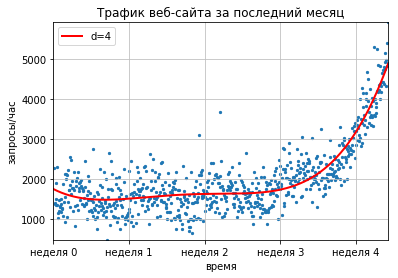

In [25]:
%matplotlib inline 
import matplotlib.pyplot as pplt


pplt.scatter(x, y, s=5) # Какой параметр задает s для метода scatter? 

# отобразим модель 

fx=sp.linspace(0,x[-1],500) # сгенерировать значения x для графика
# sp.linspace?
pplt.plot(fx,f4(fx),linewidth=2.0,color='r')
pplt.legend(["d=%i" % f4.order], loc="upper left")

# -----

pplt.title('Трафик веб-сайта за последний месяц')

pplt.xlabel("время")
pplt.ylabel("запросы/час")

pplt.xticks([w*7*24 for w in range(10)],["неделя %i" % w for w in range(10)])
pplt.autoscale(tight=True)

pplt.grid(True, linestyle='-', color='0.75')
pplt.show()

Видно, что график более плавный и лучше адаптирован к данным.
Построим ещё более сложные модели, увеличив кратно степень полинома:

In [27]:
f10p, residuals, rank, sv, rcond = sp.polyfit(x, y, 10, full=True)
print("Параметры модели {}".format(f10p))

f10 = sp.poly1d(f10p)
print(error(f10,x,y))

f50p, residuals, rank, sv, rcond = sp.polyfit(x, y, 50, full=True)
print("Параметры модели {}".format(f50p))

f50 = sp.poly1d(f50p)
print(f"{error(f50, x, y):.5}")
      

Параметры модели [-3.73981968e-22  1.36473756e-18 -2.14294406e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604588e-05  1.19167041e-02
 -9.41618606e-01  3.33703840e+01  1.26421204e+03]
121942326.36358732
Параметры модели [-4.34066540e-131  8.86498147e-128 -1.76899092e-125 -3.75324129e-122
 -1.14814316e-119  9.32974673e-117  1.27207632e-113  6.34888833e-111
 -5.44949518e-109 -3.72999264e-105 -3.38881984e-102 -1.47897730e-099
  2.56109587e-097  1.04496677e-093  9.58322695e-091  4.51716091e-088
 -3.67837632e-086 -2.82329879e-082 -2.77963238e-079 -1.38553325e-076
  7.03792820e-075  8.31506493e-071  8.12184202e-068  3.60925990e-065
 -9.13229142e-063 -2.88951185e-059 -2.22901713e-056 -4.36579005e-054
  8.60415321e-051  9.75469730e-048  3.00497373e-045 -3.24366163e-042
 -3.94598646e-039 -6.08158979e-037  1.91841729e-033  1.17949321e-030
 -7.28312337e-028 -7.92454799e-025  4.34821412e-022  3.42838518e-019
 -4.36310936e-016  2.11742524e-013 -5.96636846e-011  1.05621646e-008
 -1.1591

Отобразим модели степени полинома 10 и 50 на графике


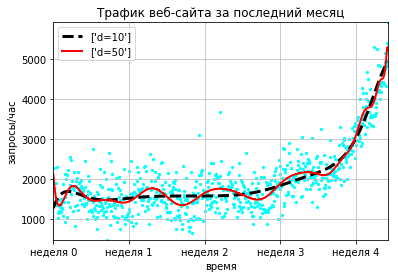

In [31]:
%matplotlib inline 
import matplotlib.pyplot as pplt


pplt.scatter(x, y, s=5, color='cyan') # Какой параметр задает s для метода scatter? 

# отобразим модель линию модели для полинома степени 10 и 50

# -----

fx=sp.linspace(0,x[-1],500) # сгенерировать значения x для графика
pplt.plot(fx, f10(fx), linewidth=3.0, color='black', ls='--') # 10
pplt.plot(fx, f50(fx), linewidth=2.0, color='r', marker=',') # 50 
pplt.legend([["d=%i" % f10.order], ["d=%i" % f50.order]], loc="upper left")

# -----

pplt.title('Трафик веб-сайта за последний месяц')

pplt.xlabel("время")
pplt.ylabel("запросы/час")

pplt.xticks([w*7*24 for w in range(10)],["неделя %i" % w for w in range(10)])
pplt.autoscale(tight=True)

pplt.grid(True, linestyle='-', color='0.75')
pplt.show()


Сравним получившиеся при вычислении погрешности:

In [33]:
print(error(f1,x,y))
print(error(f2,x,y))
print(error(f3,x,y))
print(error(f10,x,y))
print(error(f50,x,y))

317389767.339778
179983507.8781792
139350144.03172523
121942326.36358732
109504588.99779075


## Переобучение
На этом этапе мы сталкиваемся с термином "переобучение". Такая ситуация возникает, когда мы чрезмерно много обучаем нашу модель, подстраивая её под данные, которые у нас есть. Модель очень хорошо описывает данные, которые мы использовали для обучения. Однако, когда мы даем ей данные, не использованные для обучения, погрешность сильно возрастает.

Вот как эту ситуацию характеризуют в других источниках:
- https://ru.wikipedia.org/wiki/Переобучение
- http://www.machinelearning.ru/wiki/index.php?title=Переобучение


Бороться с переобучением можно разными способами, при решении этой задачи мы используем наиболее простой — уменьшим количество данных, использующихся для обучения и будем тестировать на этом небольшом остатке нашу модель.

Тестирование модели и решение проблемы переобучения рассмотрим в следующей лекции.